# Project 2

### Goal


1. Identify a large 2-node network dataset—you can start with a dataset in a repository.  Your data should meet the criteria that it consists of ties between and not within two (or more) distinct groups.

2. Reduce the size of the network using a method such as the island method described in chapter 4 of social network analysis.

3. What can you infer about each of the distinct groups?


In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import networkx.algorithms.bipartite as b
import csv
import math

**Load Data**

I chose a 2 mode dataset from toreopsahl.com for this project. 

The link to the datasetfrom the site is http://opsahl.co.uk/tnet/datasets/OF_two-mode_weightedchar.txt 

I have loaded it as a csv file into my github to read it using pandas read_csv(). The below description on the dataset is from the website.

*The Facebook-like Forum Network was attained from the same online community as the online social network; however, the focus in this network is not on the private messages exchanged among users, but on users’ activity in the forum. The forum represents an interesting two-mode network among 899 users and 522 topics in that a weight can be assigned to the ties based on the number of messages or characters that a user posted to a topic.*

In [5]:
df=pd.read_csv("https://raw.githubusercontent.com/irene908/DATA620/main/Project2.csv")
df.head()

,User_Number,Topics,Weight
0,1,1,129
1,1,39,701
2,1,102,135
3,1,154,1
4,1,357,264


**View the Data as a Graph**

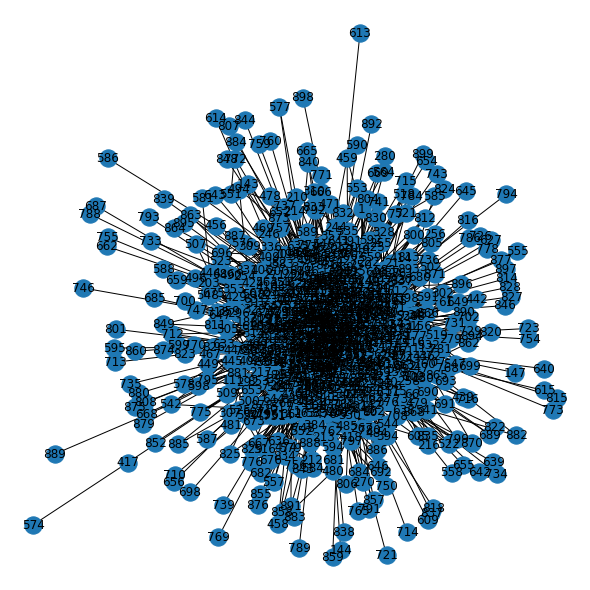

In [6]:
plt.figure(figsize=(8,8))
G= nx.from_pandas_edgelist(df,source='User_Number',target='Topics')
nx.draw(G,with_labels=True)
plt.show()

The below code enters the nodes and edges and assigns the corresponding weights to each edge.

Code from SNA text page 100.

In [7]:
csv_open = csv.reader(open('Project2.csv'))
u = []
t = []
G = nx.Graph()

for r in csv_open:
    if r[0] not in u:
        u.append(r[0])
    if r[1] not in t:
        t.append(r[1])
    G.add_edge(r[0], r[1], weight = r[2])

The below function generate connected components as subgraphs

In [8]:
def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)

Using the above function user and topics subgraphs are displayed

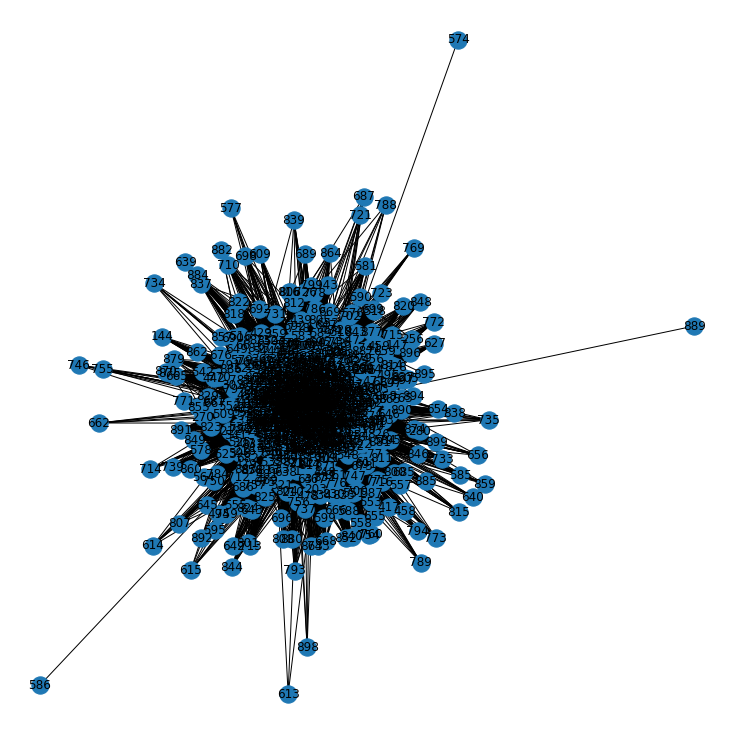

In [9]:
#Topics subgraph
plt.figure(figsize=(10,10))
G_topics = b.weighted_projected_graph(G, t, ratio=False)
G_topics = max(connected_component_subgraphs(G_topics),key=len)
weights = [edata['weight']for f,t,edata in G_topics.edges(data=True)]

nx.draw_spring(G_topics, label = 'G_topics',with_labels=True)

plt.show()

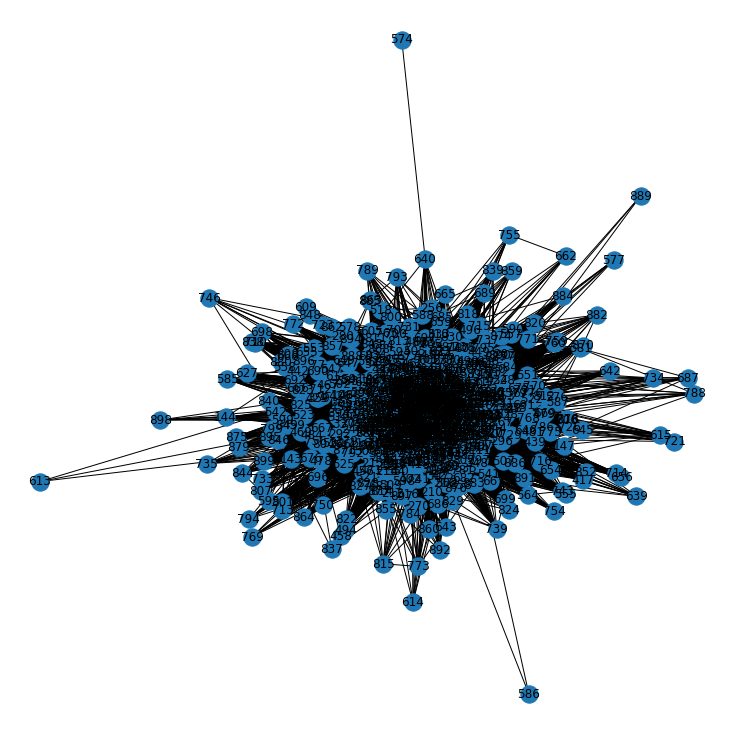

In [10]:
#Users Subgraph
plt.figure(figsize=(10,10))
G_user = b.weighted_projected_graph(G, u, ratio=False)
G_user = max(connected_component_subgraphs(G_user),key=len)
weights = [edata['weight']for f,t,edata in G_user.edges(data=True)]

nx.draw_spring(G_user, label = 'G_user', with_labels=True)

plt.show()


**Reduce the size of the network using the Island method**

Below code is from SNA textbook Page 64

In [11]:
def trim_edges(G, weight=1):
    g2 = nx.Graph()
    e = [i for i in G.edges(data=True) if i[2]['weight'] > weight]    
    g2.add_edges_from(e)
    return g2

Using the above function the edges of user and topics subgraphs are trimmed

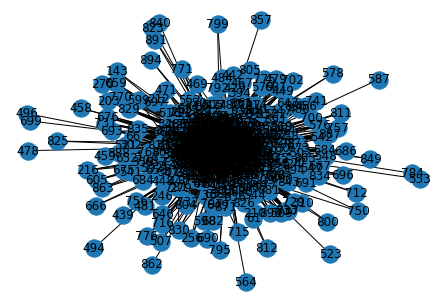

In [15]:
#trimming edges of topics
G_topics_trim = trim_edges(G_topics)
weights = [edata['weight'] for f,t,edata in G_topics_trim.edges(data=True)]

nx.draw_spring(G_topics_trim,with_labels=True)

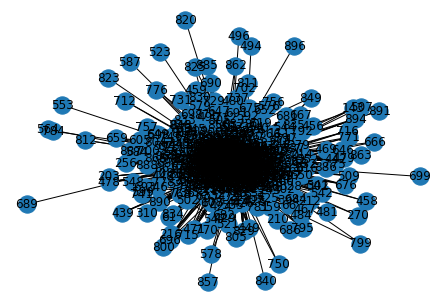

In [16]:
#trimming edges of users data
G_users_trim = trim_edges(G_user)
weights = [edata['weight'] for f,t,edata in G_users_trim.edges(data=True)]

nx.draw_spring(G_users_trim,with_labels=True)

Below is the function that carries out the Island Method

In [17]:
def island_method(g, iterations=5):
    weights = [edata['weight'] for f,to,edata in g.edges(data=True)]
    mn = int(min(weights))
    mx = int(max(weights))
    step = int((mx-mn)/iterations)
    return [[threshold, trim_edges(g, threshold)] for threshold in range(mn,mx,step)]

Using the above function Island method is applied to the users and the threshold levels along with Graph size and number of connected components are displayed.

In [18]:
i_m = island_method(G_users_trim)
print("threshold level size connected components")
for i in i_m:
    print (i[0],"\t\t", len(i[1]), len(list(connected_component_subgraphs(i[1]))))

threshold level size connected components
2 		 685 1
9 		 187 1
16 		 52 3
23 		 19 2
30 		 8 3


We can see that when the threshold is **2** the number of connected components is **1**.

But when the threshold is **16** the number of connected components is **3**.

These 2 cases are displayed below.

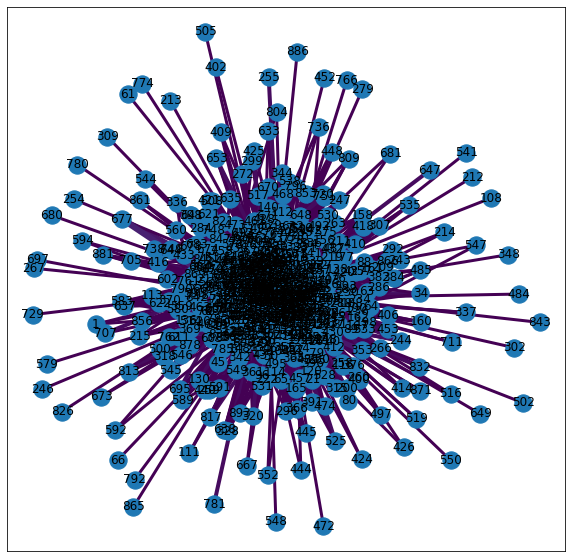

In [20]:
# Threshold 2

plt.figure(figsize=(10, 10))

T2 = trim_edges(G_users_trim,2)
weights = [edata['weight'] for f,t,edata in T2.edges(data=True)]

nx.draw_networkx(T2, width=weights, edge_color=weights)
plt.show()

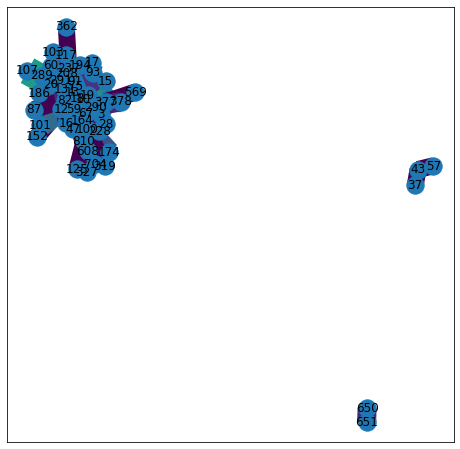

In [23]:
# Threshold 16

plt.figure(figsize=(8, 8))

T16 = trim_edges(G_users_trim,16)
weights = [edata['weight'] for f,t,edata in T16.edges(data=True)]

nx.draw_networkx(T16, width=weights, edge_color=weights)
plt.show()

**Inference**

When all links with a value of 2 are dropped, the network separates into 1 island subgraphs. Thresholding at the value of 16 reveals that there are only 52 nodes left in 3 islands.


**Video**

https://youtu.be/_H0bUI63JOk 